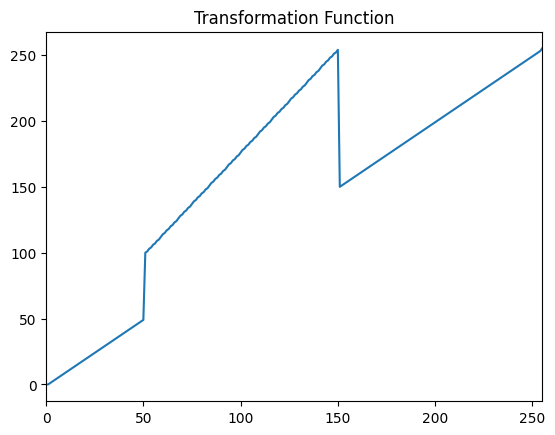

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

original = cv.imread('emma.jpg', cv.IMREAD_COLOR)

arr1=np.linspace(0 , 49,51).astype('uint8')
arr2=np.linspace(50+50,254.5,100).astype('uint8')
arr3=np.linspace(150,255,105).astype('uint8')
arr4=np.concatenate((arr2,arr3))
transform=np.concatenate((arr1,arr4))
#print(transform)

# c = np.array([(100, 50), (150, 200)])

# t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
# print(len(t1))
# t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
# print(len(t2))
# t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
# print(len(t3)) 
 
# transform = np.concatenate((t1, t2), axis=0).astype('uint8')
# transform = np.concatenate((transform, t3), axis=0).astype('uint8')
plt.plot(transform)
plt.title('Transformation Function')
plt.xlim(0, 255)
img2 = cv.LUT(original, transform)
cv.imshow('image', img2)
cv.waitKey(0)
cv.destroyAllWindows()



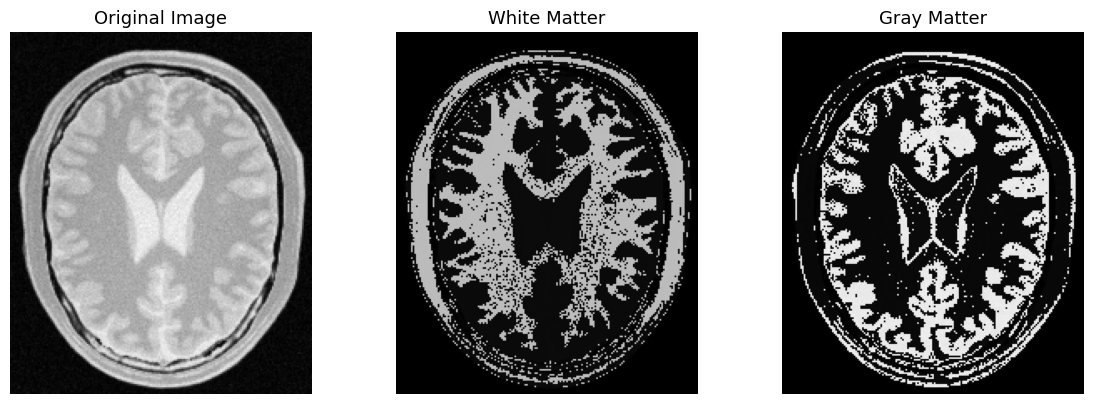

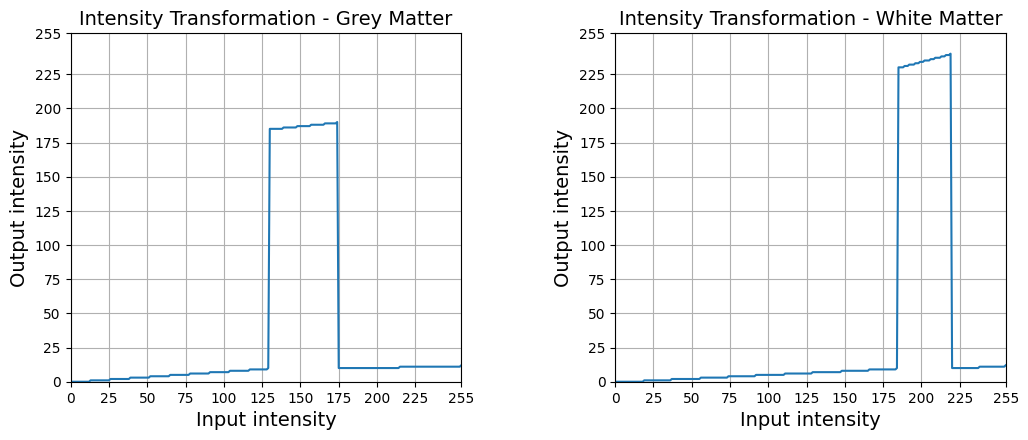

In [26]:
im = cv.imread("BrainProtonDensitySlice9.png",cv.IMREAD_GRAYSCALE)
assert im is not None

t1 = np.linspace(0, 10, 130)
t2 = np.linspace(185, 190, 45)
t3 = np.linspace(10, 12, 81)

z1 = np.linspace(0, 10, 185)
z2 = np.linspace(230, 240, 35)
z3 = np.linspace(10, 12, 36)

label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255]

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
z = np.concatenate((z1, z2, z3), axis = 0).astype(np.uint8)

assert len(t) == 256
assert len(z) == 256
g = cv.LUT(im,t)
h = cv.LUT(im,z)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', g)
cv.waitKey(0)
cv.imshow('Image', h)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1,3,figsize = (12,12))
fig.tight_layout(pad =3.0)

ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image', fontsize = 13)
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[1].set_title('White Matter', fontsize = 13)
ax[1].axis('off')

ax[2].imshow(cv.cvtColor(h,cv.COLOR_BGR2RGB))
ax[2].set_title('Gray Matter', fontsize = 13)
ax[2].axis('off')

fig, ax = plt.subplots(1,2,figsize = (12,6 ))
fig.tight_layout(pad =8.0)

ax[0].plot(t)
ax[0].set_title('Intensity Transformation - Grey Matter', fontsize = 14)
ax[0].grid('on')
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_xticks(label)
ax[0].set_yticks(label)
ax[0].set_xlabel('Input intensity', fontsize = 14)
ax[0].set_ylabel('Output intensity', fontsize = 14)

ax[1].plot(z)
ax[1].set_title('Intensity Transformation - White Matter', fontsize = 14)
ax[1].grid('on')
ax[1].set_xlim([0, 255])
ax[1].set_ylim([0, 255])
ax[1].set_xticks(label)
ax[1].set_yticks(label)
ax[1].set_xlabel('Input intensity', fontsize = 14)
ax[1].set_ylabel('Output intensity', fontsize = 14)


plt.show()

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

original = cv.imread("BrainProtonDensitySlice9.png", cv.IMREAD_COLOR)

c = np.array([(50, 150), (175, 200)])

t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype("uint8")
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype("uint8")
t3 = np.linspace(c[1, 1] + 1, 255, 255 - c[1, 0]).astype("uint8")

transform = np.concatenate((t1, t2), axis=0).astype("uint8")
transform = np.concatenate((transform, t3), axis=0).astype("uint8")

fig, ax = plt.subplots()

ax.plot(transform)
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.set_title("Transformation Function")
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.grid(True)
plt.show()

img2 = cv.LUT(original, transform)
cv.imshow("image", img2)
cv.waitKey(0)
cv.destroyAllWindows()

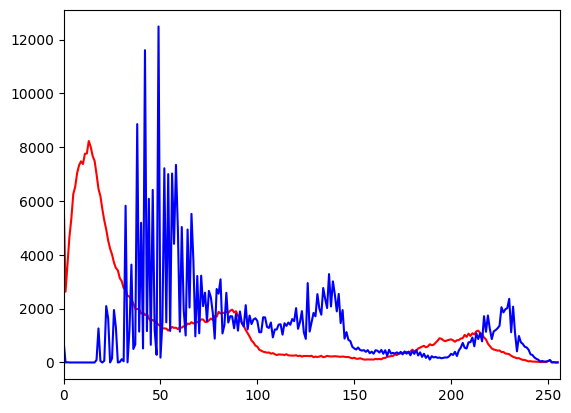

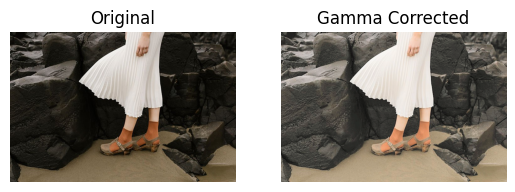

In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

original = cv.imread("highlights_and_shadows.jpg", cv.IMREAD_COLOR)
#i want to disect the image into l a b

lab = cv.cvtColor(original, cv.COLOR_BGR2LAB)
l, a, b = cv.split(lab)

#apply gamma correction to the l channel
gamma = 0.5
l = (np.power(l/255, gamma) * 255).astype('uint8')
#merge the channels back together and convert back to bgr
lab = cv.merge((l, a, b))
img2 = cv.cvtColor(lab, cv.COLOR_LAB2BGR)

#show the histograms of the original and modified images
hist1=cv.calcHist([original], [0], None, [256], [0, 256])
hist2=cv.calcHist([img2], [0], None, [256], [0, 256])
plt.plot(hist1, color='r')
plt.plot(hist2, color='b')
plt.xlim([0, 256])

#show the histograms of the original and modified images
fig, ax = plt.subplots(1, 2)    
ax[0].imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[0].set_title("Original")
ax[1].set_title("Gamma Corrected")
ax[0].axis("off")
ax[1].axis("off")
plt.show()


In [59]:
#split the image into hue saturation and value channels
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

original= cv.imread("spider.png", cv.IMREAD_COLOR)
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)
x= np.linspace(0,255,256)

fig,ax=plt.subplots(1,5,figsize=(15,10))

for a in range(0,5):
    transform = np.minimum(x+a//5*128*np.exp(-(x-128)**2/(2*70**2)), 255).astype('uint8')
    h=cv.LUT(h,transform)
    hsv = cv.merge((h, s, v))
    img2 = cv.cvtColor(hsv, cv.COLOR_HSV2RGB)
    ax[a].imshow(img2)
    ax[a].axis("off")
    ax[a].set_title("a= "+str(a/5))

     

plt.show()  






5.

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
im = cv2.imread("shells.tif", cv2.IMREAD_GRAYSCALE)
assert im is not None

# Create a copy of the original image
ims = im.copy()

# Calculate the histogram of the original image
hist = cv2.calcHist([im], [0], None, [256], [0, 256])

# Find the low and high values in the histogram
low = np.min(np.where(hist > 0))
high = np.max(np.where(hist > 0))

# Perform histogram equalization
ims = np.round((ims - low) * ((255 - 0) / (high - low))).astype(np.uint8)

# Calculate the histogram of the equalized image
hist_eq = cv2.calcHist([ims], [0], None, [256], [0, 256])

# Display the original image, its histogram, the equalized image, and its histogram
fig, ax = plt.subplots(2, 2, figsize=(26, 13))
plt.subplots_adjust(wspace=-0.1, hspace=None)

ax[0, 0].imshow(im, cmap='gray')
ax[0, 0].set_title("Original Image", fontsize=14)
ax[0, 0].axis("off")

ax[0, 1].plot(hist)
ax[0, 1].set_title("Histogram of Original Image", fontsize=14)
ax[0, 1].grid('on')

ax[1, 0].imshow(ims, cmap='gray')
ax[1, 0].set_title("Equalized Image", fontsize=14)
ax[1, 0].axis("off")

ax[1, 1].plot(hist_eq)
ax[1, 1].set_title("Histogram of Equalized Image", fontsize=14)
ax[1, 1].grid('on')

plt.show()


6

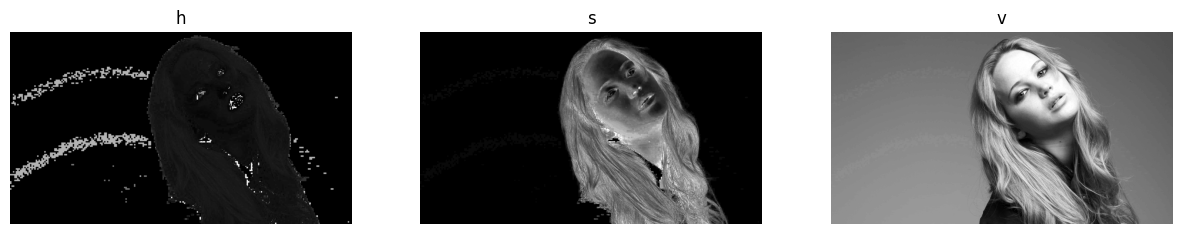

error: OpenCV(4.8.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0x192ee1e6::Set<3,4,-1>,struct cv::impl::A0x192ee1e6::Set<0,2,5>,3>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3


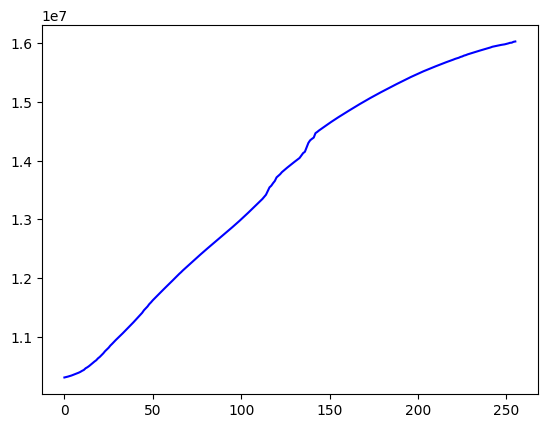

In [19]:
#split the image into hue saturation and value channels
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

original= cv.imread("jeniffer.jpg", cv.IMREAD_COLOR)
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)
planes = ['h', 's', 'v']
fig,ax=plt.subplots(1,3,figsize=(15,10))

for a,x in enumerate(cv.split(hsv)):   
    ax[a].imshow(x, cmap='gray')
    ax[a].axis("off")
    ax[a].set_title(planes[a])
plt.show()  
#we select the saturation channel to extract the foreground of the image
ret, mask = cv.threshold(s, 5, 255, cv.THRESH_BINARY)
plt.imshow(mask,cmap='gray')
plt.title("mask")
plt.show()
mask_inv = cv.bitwise_not(mask)
img1_bg = cv.bitwise_and(original,original,mask = mask_inv)
img1_fg = cv.bitwise_and(original,original,mask = mask)

plt.imshow(cv.cvtColor(img1_bg,cv.COLOR_BGR2RGB) )
plt.imshow(cv.cvtColor(img1_fg,cv.COLOR_BGR2RGB) )
plt.show()

hist,bins = np.histogram(img1_fg.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')

fgndEq=cv.equalizeHist(cv.cvtColor(img1_fg,cv.COLOR_RGB2GRAY))

result=cv.add(cv.cvtColor(fgndEq,cv.COLOR_GRAY2RGB),cv.cvtColor(img1_bg,cv.COLOR_GRAY2RGB))
plt.show(np.hstack(original,result))
plt.show()

    


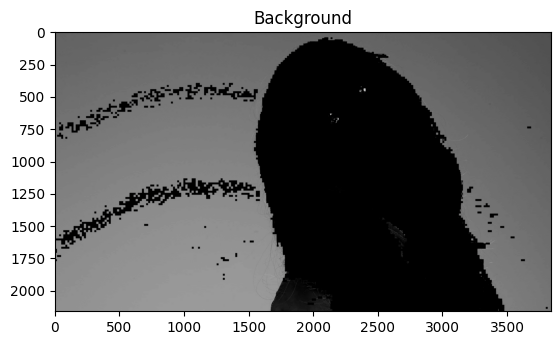

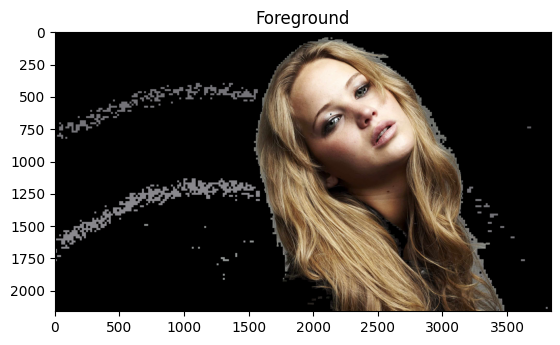

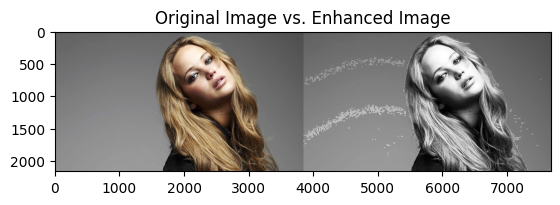

In [36]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original = cv.imread("jeniffer.jpg", cv.IMREAD_COLOR)

# Convert the image to HSV color space
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value channels
h, s, v = cv.split(hsv)

# Display the individual channels
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

for a, x in enumerate([h, s, v]):
    ax[a].imshow(x, cmap='gray')
    ax[a].axis("off")
    ax[a].set_title(['Hue', 'Saturation', 'Value'][a])

plt.show()

# Create a mask to extract the foreground based on the saturation channel
ret, mask = cv.threshold(s, 5, 255, cv.THRESH_BINARY)

# Invert the mask
mask_inv = cv.bitwise_not(mask)

# Separate the background and foreground
img1_bg = cv.bitwise_and(original, original, mask=mask_inv)
img1_fg = cv.bitwise_and(original, original, mask=mask)

# Display the background and foreground
plt.imshow(cv.cvtColor(img1_bg, cv.COLOR_BGR2RGB))
plt.title("Background")
plt.show()

plt.imshow(cv.cvtColor(img1_fg, cv.COLOR_BGR2RGB))
plt.title("Foreground")
plt.show()

# Perform histogram equalization on the foreground
fgndEq = cv.equalizeHist(cv.cvtColor(img1_fg, cv.COLOR_RGB2GRAY))

# Combine the equalized foreground with the background
result = cv.add(cv.cvtColor(fgndEq, cv.COLOR_GRAY2RGB), img1_bg)
original=cv.cvtColor(original,cv.COLOR_BGR2RGB)
# Display the result
plt.imshow(np.hstack((original, result)))
plt.title("Original Image vs. Enhanced Image")
plt.show()


7

In [37]:
im = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)
assert im is not None

sobel_v = np.array([[-1 , -2, -1] , [0 ,0 , 0] , [1 , 2, 1] ], dtype=np.float32)
f_x = cv.filter2D(im, -1, sobel_v)

sobel_h = np.array([[-1 , 0, 1] , [-2 ,0 , 2] , [-1 , 0, 1] ], dtype=np.float32)
f_h = cv.filter2D(im, -1, sobel_h)


fig, ax = plt.subplots(1, 3, figsize=(16, 16))
ax[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title("Original")
ax[0].axis('off')

ax[1].imshow(f_x, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[1].set_title("Sobel vertical")
ax[1].axis('off')

ax[2].imshow(f_h, cmap = 'gray', vmin = -1020, vmax = 1020)
ax[2].set_title("Sobel horizontal")
ax[2].axis('off')


plt.show()

In [40]:
im_g = np.zeros((im.shape[0],im.shape[1]),np.uint8)

for i in range(1,im.shape[0]-1):
    for j in range(1,im.shape[1]-1):
        f_xx = im[i-1, j-1]*(-1) + im[i-1, j]*(-2) + im[i-1, j+1]*(-1) + im[i+1, j-1]*1 + im[i+1, j]*2 + im[i+1, j+1]*1
        f_hh = im[i-1, j-1]*(-1) + im[i, j-1]*(-2) + im[i-1, j+1]*1 + im[i+1, j-1]*(-1) + im[i, j+1]*2 + im[i+1, j+1]*1
        grad = np.sqrt(f_xx**2 + f_hh**2)
        im_g[i, j] = (grad / 1020) * 255
        
        
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(im_g, cmap = 'gray')
ax[1].set_title("Sobel Filtered Image")
ax[1].axis('off')

plt.show()

In [ ]:
#using the given property
im_gd = np.zeros((im.shape[0],im.shape[1]),np.uint8)

mat = np.multiply((np.array([[1],[2],[1]], dtype=np.int32)),(np.array([1,0,-1], dtype=np.int32)))

sobel_hh = np.array([[0,0,0],[0,0,0],[0,0,0]])
for i in range(len(mat)):
    sobel_hh[i] = mat[i][::-1]

sobel_vv = sobel_hh.T

for i in range(1,im.shape[0]-1):
    for j in range(1,im.shape[1]-1):
        image = np.array([[im[i-1,j-1],im[i,j],im[i+1,j+1]], [im[i,j-1],im[i,j],im[i,j+1]], [im[i+1,j-1],im[i+1,j],im[i+1,j+1]]], dtype=np.float32)
        ##print(image)
        val_xx = 0
        val_yy = 0
        for k in range(3):
            for m in range(3):
                val_xx += image[k][m]*sobel_hh[k][m]
                val_yy += image[k][m]*sobel_vv[k][m]
        ##print(val_xx, val_yy)
        grad = np.sqrt(val_xx**2 + val_yy**2)
        im_gd[i, j] = (grad / 1020) * 255
                
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(im_gd, cmap = 'gray')
ax[1].set_title("Sobel Filtered Image - Using Given Property")
ax[1].axis('off')

plt.show() 

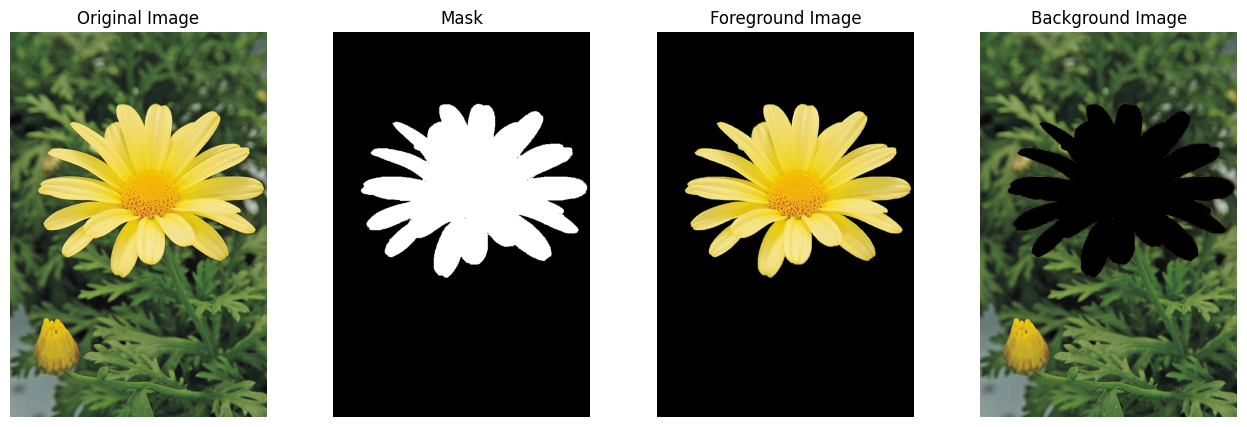

In [41]:
im = cv.imread("daisy.jpg", cv.IMREAD_COLOR)
im_original = im.copy()

mask = np.zeros(im.shape[:2], np.uint8)
rect = (0, 90, 560, 500)
fgdModel = np.zeros((1, 65), np.float64)
bgdModel = np.zeros((1, 65), np.float64)

cv.grabCut(im, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

mask1 = np.where((mask==0) | (mask==2), 0, 1).astype("uint8")
im_fgd = im*mask1[:, :, np.newaxis]
mask2 = np.where((mask==1) | (mask==3), 0, 1).astype("uint8")
im_bgd = im*mask2[:, :, np.newaxis]

cv.imshow('Image', im_bgd)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 4, figsize=(16, 5))

ax[0].imshow(cv.cvtColor(im_original, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(mask1, cmap = "gray")
ax[1].set_title("Mask")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(im_fgd, cv.COLOR_BGR2RGB))
ax[2].set_title("Foreground Image")
ax[2].axis("off")

ax[3].imshow(cv.cvtColor(im_bgd, cv.COLOR_BGR2RGB))
ax[3].set_title("Background Image")
ax[3].axis("off")

plt.show()

In [42]:
im_blurred = cv.blur(im_bgd, (15, 15))
im_enhanced = cv.add(im_blurred, im_fgd)

fig, ax = plt.subplots(1, 2, figsize=(9, 6))

ax[0].imshow(cv.cvtColor(im_original, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(im_enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title("Enhanced Image")
ax[1].axis("off")

plt.show()

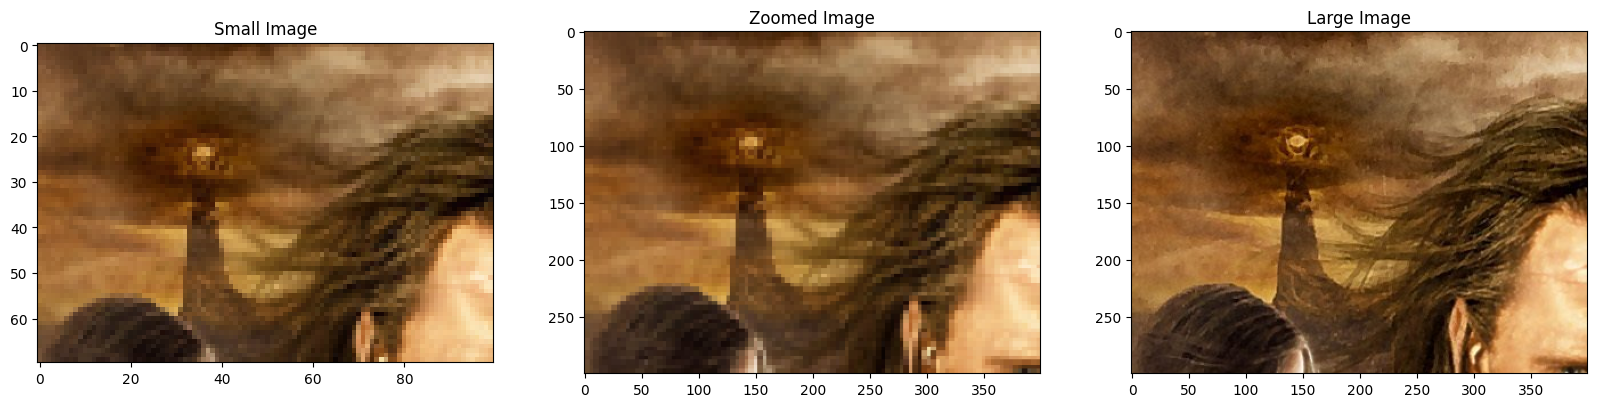

In [44]:
def nn_zoom(image, scaling_factor):
    s = scaling_factor
    img = image

    row = img.shape[0] * s
    column = img.shape[1] * s
    zoomed_Img = np.zeros((row, column, 3), dtype = np.uint8)
    for i in range(row):
        for j in range(column):
                zoomed_Img[i, j] = img[round(i/s - 0.5), round(j/s - 0.5)]
                
    return zoomed_Img
                        
im = cv.imread("zooming\im01small.png")
im_large = cv.imread("zooming\im01.png")
assert im is not None

im_znn = nn_zoom(im, 4)

cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', im_znn)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(im[0:70, 0:100], cv.COLOR_BGR2RGB))
ax[0].set_title("Small Image")

ax[1].imshow(cv.cvtColor(im_znn[0:75*4, 0:100*4], cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Image")

ax[2].imshow(cv.cvtColor(im_large[0:75*4, 0:100*4], cv.COLOR_BGR2RGB))
ax[2].set_title("Large Image")

plt.show()

In [45]:
def SSD(img1,img2):
    val = (np.sum((img1.astype("float")-img2.astype("float"))**2))/float(img1.shape[0]*img1.shape[1])
    return val

ssd = SSD(im_large,im_znn)
print(ssd)

489.0480126350309


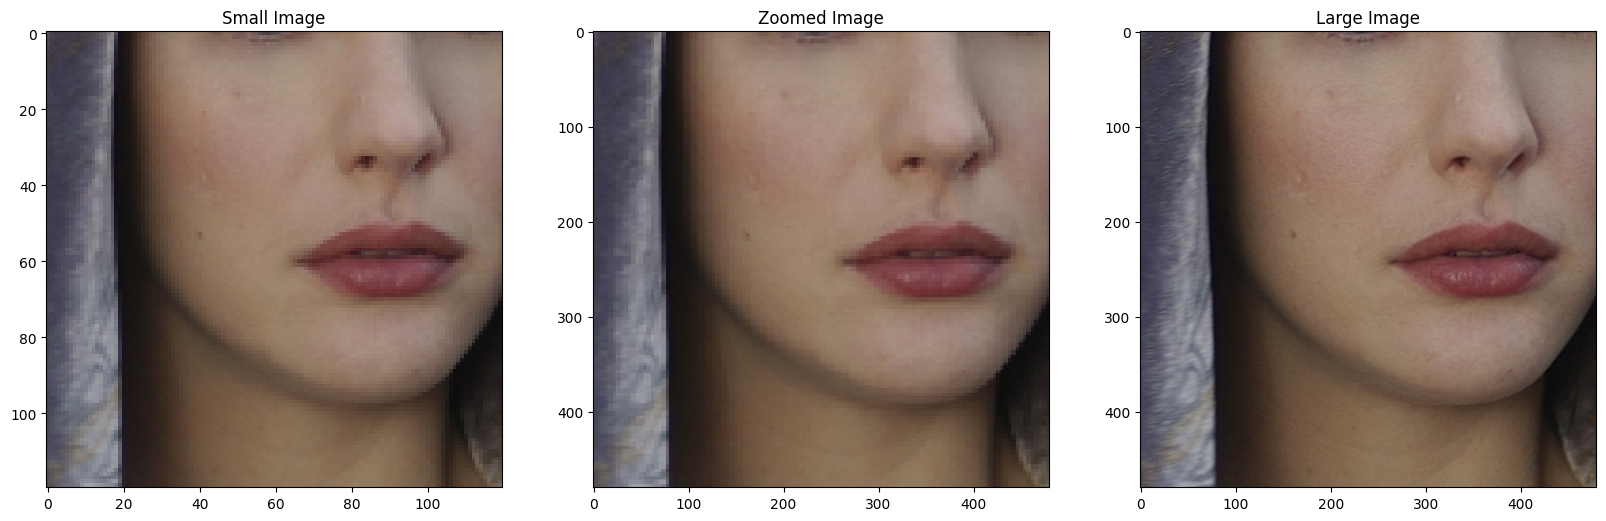

101.43840755208333


In [46]:
im = cv.imread("zooming\im02small.png")
im_large = cv.imread("zooming\im02.png")
assert im is not None

im_znn = nn_zoom(im, 4)

cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', im_znn)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(im[150:270, 150:270], cv.COLOR_BGR2RGB))
ax[0].set_title("Small Image")

ax[1].imshow(cv.cvtColor(im_znn[150*4:270*4, 150*4:270*4], cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Image")

ax[2].imshow(cv.cvtColor(im_large[150*4:270*4, 150*4:270*4], cv.COLOR_BGR2RGB))
ax[2].set_title("Large Image")

plt.show()
ssd = SSD(im_large,im_znn)
print(ssd)

In [47]:
im = cv.imread("zooming\im03small.png")
im_large = cv.imread("zooming\im03.png")
assert im is not None

im_znn = nn_zoom(im, 4)

cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', im_znn)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(im[150:270, 150:270], cv.COLOR_BGR2RGB))
ax[0].set_title("Small Image")

ax[1].imshow(cv.cvtColor(im_znn[150*4:270*4, 150*4:270*4], cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Image")

ax[2].imshow(cv.cvtColor(im_large[150*4:270*4, 150*4:270*4], cv.COLOR_BGR2RGB))
ax[2].set_title("Large Image")

plt.show()

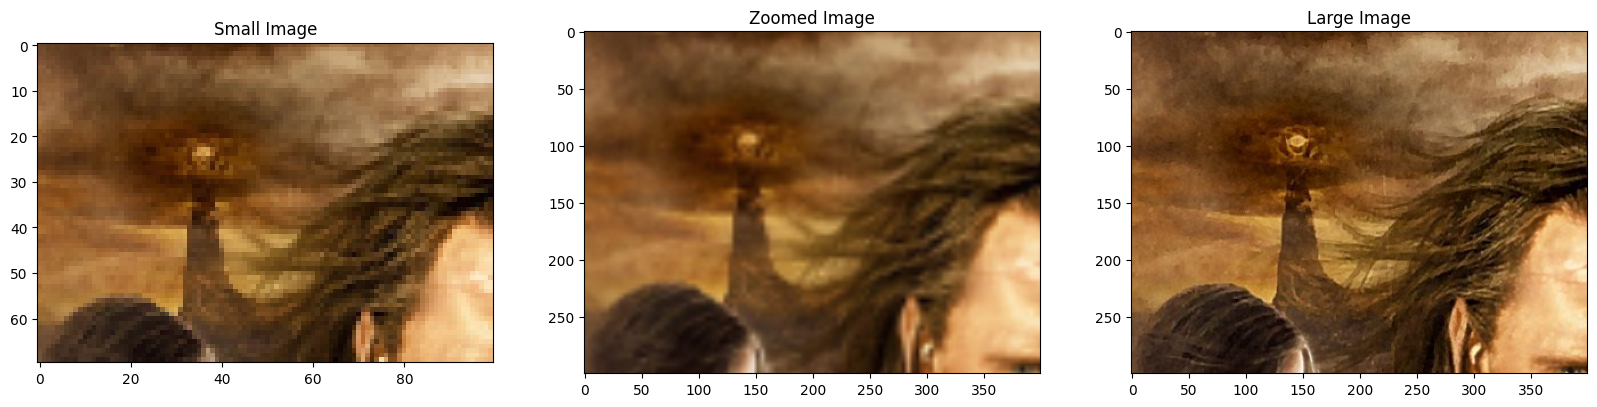

In [50]:
import math

def bl_zoom(Image, new_h, new_w):
    im = Image
    old_h, old_w, c = im.shape
    resized = np.zeros((new_h, new_w, c))
    
    if new_h !=0:
         w_scale_factor = (old_w) / (new_w)
    else:
        w_scale_factor = 0
        
    if new_w != 0:
         h_scale_factor = (old_h) / (new_h)
    else:
         h_scale_factor = 0
    
    for i in range(new_h):
        for j in range(new_w):
            x = i * h_scale_factor
            y = j * w_scale_factor
            
            x_floor = math.floor(x)
            x_ceil = min(old_h - 1, math.ceil(x))
            y_floor = math.floor(y)
            y_ceil = min(old_w - 1, math.ceil(y))
            if (x_ceil == x_floor) and (y_ceil == y_floor):
                q = im[int(x), int(y), :]
                
            elif (x_ceil == x_floor):
                a = im[int(x), int(y_floor), :]
                b = im[int(x), int(y_ceil), :]
                q = a * (y_ceil - y) + b * (y - y_floor)
                
            elif (y_ceil == y_floor):
                a = im[int(x_floor), int(y), :]
                b = im[int(x_ceil), int(y), :]
                q = (a * (x_ceil - x)) + (b * (x - x_floor))
                
            else:
                m = im[x_floor, y_floor, :]
                n = im[x_ceil, y_floor, :]
                p = im[x_floor, y_ceil, :]
                r = im[x_ceil, y_ceil, :]

                a = m * (x_ceil - x) + n * (x - x_floor)
                b = p * (x_ceil - x) + r * (x - x_floor)
                q = a * (y_ceil - y) + b * (y - y_floor) 
           
            resized[i,j,:] = q
            
    return resized.astype(np.uint8)
            
            
im = cv.imread("zooming\im01small.png")
im_large = cv.imread("zooming\im01.png")
assert im is not None

old_h, old_w, c = im.shape
im_zbl = bl_zoom(im, 4*old_h, 4*old_w)

cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', im_zbl)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(im[0:70, 0:100], cv.COLOR_BGR2RGB))
ax[0].set_title("Small Image")

ax[1].imshow(cv.cvtColor(im_zbl[0:75*4, 0:100*4], cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Image")

ax[2].imshow(cv.cvtColor(im_large[0:75*4, 0:100*4], cv.COLOR_BGR2RGB))
ax[2].set_title("Large Image")

plt.show()

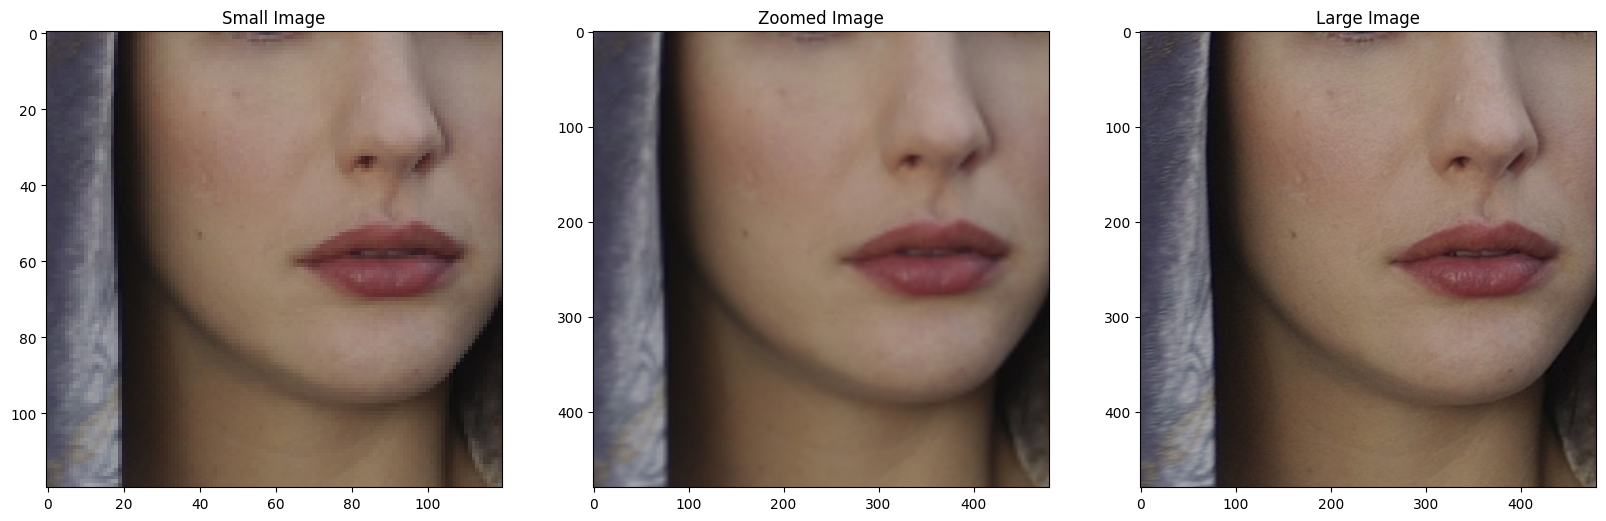

146.88199652777777


In [51]:
im = cv.imread("zooming\im02small.png")
im_large = cv.imread("zooming\im02.png")
assert im is not None

old_h, old_w, c = im.shape
im_zbl = bl_zoom(im, 4*old_h, 4*old_w)

cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', im_zbl)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(im[150:270, 150:270], cv.COLOR_BGR2RGB))
ax[0].set_title("Small Image")

ax[1].imshow(cv.cvtColor(im_zbl[150*4:270*4, 150*4:270*4], cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Image")

ax[2].imshow(cv.cvtColor(im_large[150*4:270*4, 150*4:270*4], cv.COLOR_BGR2RGB))
ax[2].set_title("Large Image")

plt.show()
ssd = SSD(im_large,im_zbl)
print(ssd)

In [ ]:
im = cv.imread("zooming\im03small.png")
im_large = cv.imread("zooming\im03.png")
assert im is not None

old_h, old_w, c = im.shape
im_zbl = bl_zoom(im, 4*old_h, 4*old_w)

cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', im_zbl)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(im[150:270, 150:270], cv.COLOR_BGR2RGB))
ax[0].set_title("Small Image")

ax[1].imshow(cv.cvtColor(im_zbl[150*4:270*4, 150*4:270*4], cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Image")

ax[2].imshow(cv.cvtColor(im_large[150*4:270*4, 150*4:270*4], cv.COLOR_BGR2RGB))
ax[2].set_title("Large Image")

plt.show()